In [11]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Get Kaggle API keys from environment variables
kaggle_username = os.environ.get('YOUR_USERNAME')
kaggle_key = os.environ.get('YOUR_KEY')

# Configure the Kaggle API
api = KaggleApi()
api.authenticate(username=kaggle_username, key=kaggle_key)

# Specify the name of the dataset you want to download
dataset_name = 'andradaolteanu/gtzan-dataset-music-genre-classification'

# Command to download the dataset
api.dataset_download_files(dataset_name, unzip=True)

In [5]:
pip install --user matplotlib



  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)


In [1]:
import matplotlib.pyplot as plt

In [7]:
pip install librosa

In [2]:
import pandas as pd
import numpy as np 
import scipy  # Import scipy: Adds the SciPy library for scientific and technical computations.
import os
import pickle
import librosa  # Import librosa: Adds the Librosa library for audio analysis.
import librosa.display  # Import librosa.display: Used for visualizing results of audio analysis with Librosa.
import IPython.display as ipd  # Import IPython.display as ipd: Used to play audio files within IPython.
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [3]:
# Reading the csv file
df = pd.read_csv("C:\\Users\\AGSTAJER\\Desktop\\music_classification\\Data\\features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
df.shape

(9990, 60)

In [5]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

Proposed Methodology

indir.png

In [6]:
# Loading a sample audio from the dataset
audio_path = "C:/Users/AGSTAJER/Desktop/music_classification/Data/genres_original/reggae/reggae.00010.wav"
data, sr = librosa.load(audio_path)  # Load the audio file using the Librosa library
print(type(data), type(sr))  # Print the type of the loaded audio data and the sampling rate

<class 'numpy.ndarray'> <class 'int'>


type(sr): This expression prints the Python data type of the sampling rate. Sample rate refers to the number of samples per second.

In [7]:
# Load an audio file using the Librosa library and set the sampling rate to a specific value
librosa.load(audio, sr=45600)

(array([-0.00555292, -0.00768963, -0.00668519, ...,  0.08035275,
         0.0663713 ,  0.03239053], dtype=float32),
 45600)

It refers to setting the sample rate to a specific value (45600 in this example) when loading the audio file using the Librosa library. When loading an audio file, usually the sample rate refers to the number of samples of sound waves per second. This value affects how the audio file is represented and played back.

In [8]:
# Compute the Short-Time Fourier Transform (STFT) of the audio signal
y = librosa.stft(data)

# Obtain the spectrogram and express it in decibels
S_db = librosa.amplitude_to_db(np.abs(y), ref=np.max)

In [9]:
# Playing audio file
import IPython

# Use IPython's Audio class to play the audio file. 'data' variable represents the audio data, 
# and 'rate' represents the sampling rate.
IPython.display.Audio(data, rate=sr)

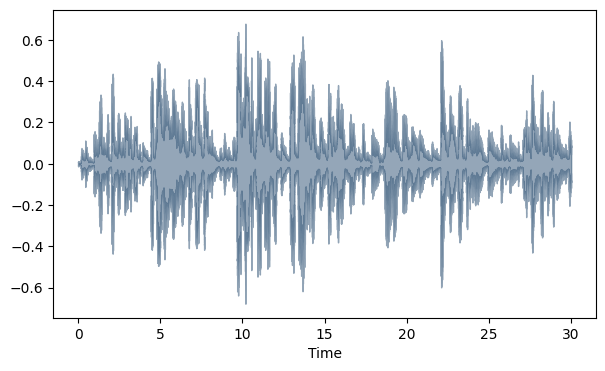

In [10]:
# Waveform of the audio
plt.figure(figsize=(7, 4))
librosa.display.waveshow(data, color="#2B4F72", alpha=0.5)
# Visualize the waveform of the audio file.
# 'data' variable represents the audio data,
# 'color' parameter sets the color of the waveform,
# 'alpha' parameter adjusts the transparency of the color.
plt.show()

A spectrogram is a graph that visually represents the frequency content of an audio file over time. Spectrograms are used to understand the frequency components of an audio signal, track their changes over time, and visually analyze power levels at specific frequencies.

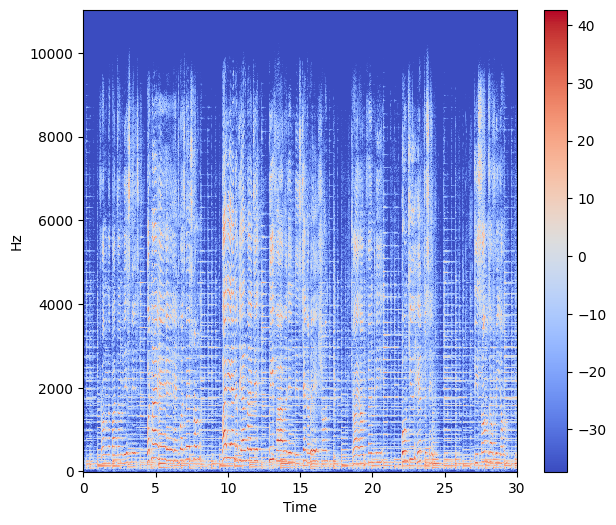

In [11]:
# Create the spectrogram of the audio file
stft = librosa.stft(data)  # Obtain the Short-Time Fourier Transform (STFT) of the audio signal.
stft_db = librosa.amplitude_to_db(abs(stft))  # Get the amplitude information of the STFT and express it in decibels.

# Visualize the spectrogram
plt.figure(figsize=(7, 6))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Data preprocessing,

It is the process of extracting features from data for use in a machine learning or audio signal analysis project. Extracting features from audio signals aims to transform the information contained in the signal into a more meaningful and learnable format. Depending on the purpose of your project, it is possible to extract different features.

The "Spectral Roll-off" feature you specifically mentioned,

It refers to the point at which a percentage of the spectral energy remains below a certain frequency. This feature is used to understand the distribution of spectral content and characterize audio signals.

The Turkish explanation of Spectral Roll-off is as follows:

Spectral Roll-off: Spectral Roll-off frequency refers to the frequency at which a certain percentage of the spectral energy of an audio signal remains below. That is, it indicates the point where most of the energy of the audio signal comes from low-frequency components. Specifically, a certain percentage value (usually 85% or 95%) is determined and this percentage represents the fraction of the total energy below the frequency at that point.

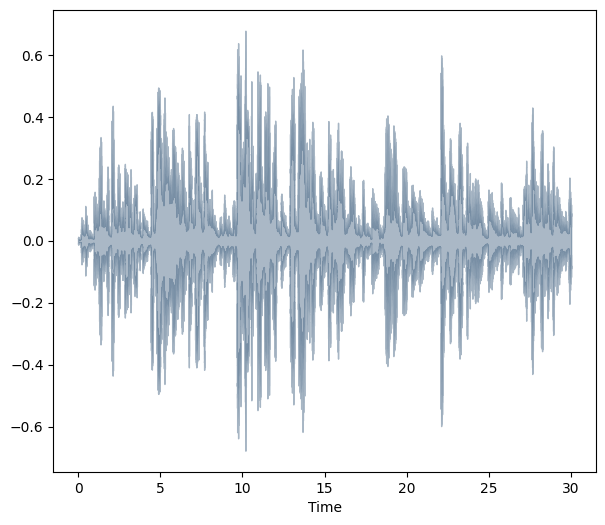

In [12]:
# Calculate the spectral roll-off of the audio file
spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sr)[0]
# 'y' parameter represents the audio data,
# 'sr' parameter represents the sampling rate.
# [0] index is used to obtain a numpy array containing the calculated spectral roll-off values for each time frame.

# Visualize the waveform with an overlay of the spectral roll-off
plt.figure(figsize=(7, 6))
librosa.display.waveshow(data, sr=sr, alpha=0.4, color="#2B4F72")

The index [0] in librosa.feature.spectral_rolloff(y=data, sr=sr)[0] indicates that the output of the librosa.feature.spectral_rolloff function is a NumPy array. This function produces a matrix containing the spectral roll-off values calculated for each time frame. Each column of this matrix corresponds to a time frame, and we select the resulting sequence from these columns with index [0].

In this particular case, the output of the librosa.feature.spectral_rolloff function is a matrix, and we select the first column of this matrix with index [0]. That is, we obtain a NumPy array containing a spectral roll-off value for each time frame.

Using this array, we can visualize how we change spectral roll-off values over time or how we can use them for another purpose. For example, plotting these values on the waveform can help us see the change of spectral roll-off over time.

-------------------------------------------------- -----
Chroma features,

It is one of the powerful tools used to analyze and categorize the tonal properties of music. Chroma is closely related to the twelve different pitch classes of music and is therefore also called "pitch class profiles". These features are designed to capture the harmonic and melody characteristics of music.

The main purpose of Chroma features is to

is to determine which pitch class the fundamental frequency of each sound belongs to. They play an important role in analyzing the sounds produced by tone instruments, chords and melodies in music. Chroma features aim to represent the tonal properties of music more effectively by focusing only on the pitch class of a sound, without representing its frequency content.

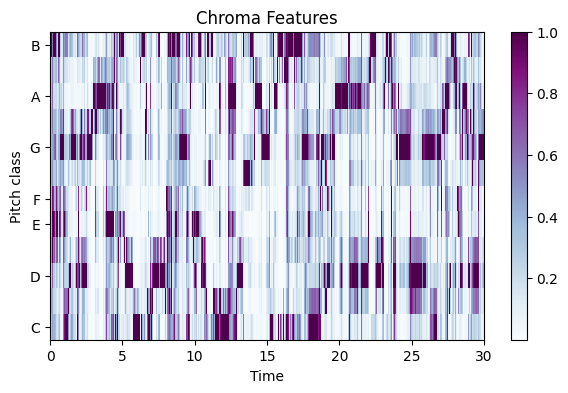

In [13]:
import librosa.display as lplt

# Calculate chroma features of the audio file
chroma = librosa.feature.chroma_stft(y=data, sr=sr)
# 'y' parameter represents the audio data,
# 'sr' parameter represents the sampling rate.

plt.figure(figsize=(7, 4))

# Visualize the chroma features as a spectrogram
lplt.specshow(chroma, sr=sr, x_axis="time", y_axis="chroma", cmap="BuPu")
# Display the matrix containing chroma features as a spectrogram.
# 'sr' parameter represents the sampling rate.
# 'x_axis' and 'y_axis' parameters specify how the axes are labeled (time and chroma classes).
# 'cmap' parameter sets the color map.

plt.colorbar()
plt.title("Chroma Features")
plt.show()

-----------------------------------------
Zero Crossing Rate (ZCR),

  It is a property that indicates the number of times an audio signal crosses the x-axis (i.e. zero level). This feature is used to analyze the fluctuations and changes of an audio signal over time. Zero Crossing refers to the transition of a signal from positive to zero, from zero to negative, or vice versa.

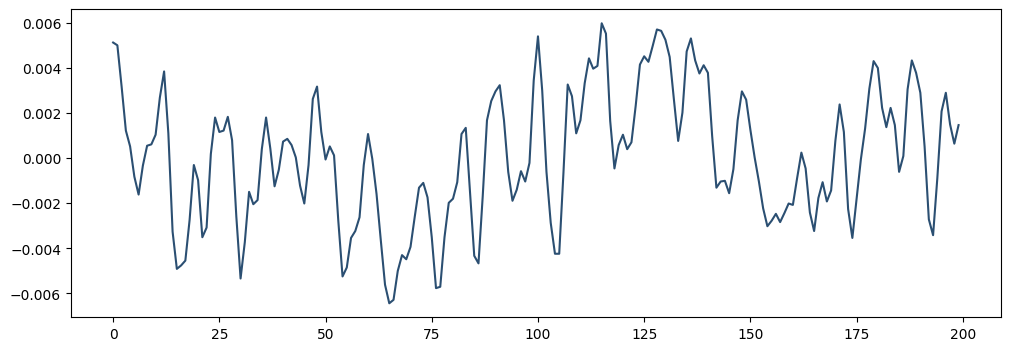

In [14]:
start = 1000
end = 1200
# 'start' and 'end' variables represent a specific time range of the audio signal to visualize.
# For example, they specify the sampling points corresponding to a certain range of seconds.

plt.figure(figsize=(12, 4))

# Plot the segment of the audio signal within the specified time range
plt.plot(data[start:end], color="#2B4F72")

In [15]:
# Calculate the zero crossings in the specified time range of the audio signal
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
# 'start' and 'end' represent the indices corresponding to the specified time range of the audio signal.
# 'pad=False' ensures that the signal is not zero-padded.

# Print the number of zero crossings
print("The number of zero crossings is:", sum(zero_cross_rate))

The number of zero_crossings are : 36


--------------------------------
Data exploration (Exploratory Data Analysis - EDA),

  It is a process used to understand a data set, visualize its content, and perform some basic analysis on it. Performing EDA on audio files can help us understand the general characteristics of our dataset and prepare for further analysis. This process is especially important on audio-related data sets such as musical genres.

In [26]:
pip install --upgrade matplotlib

   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.6 MB 3.5 MB/s eta 0:00:03
   - -------------------------------------- 0.4/7.6 MB 2.6 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/7.6 MB 3.3 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/7.6 MB 3.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/7.6 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/7.6 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.6 MB 2.7 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.6 MB 2.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.6 MB 2.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.6 MB 1.9 MB/s eta 0:00:04
   ----------- ---------------------------- 2.2/7.6 MB 3.8 MB/s eta 0:00:02
   ------------ ----------

ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'c:\\users\\agstajer\\appdata\\local\\programs\\python\\python311\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pip install librosa matplotlib numpy scipy


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'c:\\Users\\AGSTAJER\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\ft2font.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)


In [ ]:
# 1. BLUES 
audio1 = 'C:/Users/AGSTAJER/Desktop/music_classification/Data/genres_original/blues/blues.00001.wav'
data, sr = librosa.load(audio1)

# Waveform plot
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr, alpha=0.4)
# Visualize the waveform of the audio file. 'data' variable represents the audio data, and 'sr' represents the sampling rate.
plt.title('Waveplot - BLUES')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))

spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
# Compute the Mel spectrogram, a visual representation of how frequency changes over time.

spectrogram = librosa.power_to_db(spectrogram)
# Convert the Mel spectrogram to a logarithmic scale.

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram - BLUES')
plt.colorbar(format='%+2.0f dB')

# Playing audio
ipd.Audio(audio1)  # Play the audio file. This provides a real listening experience of the audio file.

In [ ]:
# 2. CLASSICAL -
audio1= 'C:/Users/AGSTAJER/Desktop/music_classification/Data/genres_original/classical/classical.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - CLASSICAL') 

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram -CLASSICAL')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1) 

In [ ]:
# 3. COUNTRY
audio1= 'C:/Users/AGSTAJER/Desktop/music_classification/Data/genres_original/country/country.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - COUNTRY')

# Ccreating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - COUNTRY')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [ ]:
# 4. DISCO
audio1= 'C:/Users/AGSTAJER/Desktop/music_classification/Data/genres_original/disco/disco.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - DISCO')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - DISCO')
plt.colorbar(format='%+2.0f dB');
# playing audio
ipd.Audio(audio1) 

In [ ]:
# 5. HIPHOP
audio1= 'C:/Users/AGSTAJER/Desktop/music_classification/Data/genres_original/hiphop/hiphop.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr, alpha = 0.4)
plt.title('Waveplot - HIPHOP')

# Creating log mel spectrogram 
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000,) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - HIPHOP')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [ ]:
# 6. JAZZ
audio1= 'C:/Users/AGSTAJER/Desktop/music_classification/Data/genres_original/jazz/jazz.00001.wav'
data, sr = librosa.load(audio1)
plt.figure(figsize=(7, 3))
librosa.display.waveshow(data, sr=sr,alpha=0.4)
plt.title('Waveplot - JAZZ')

# Creating log mel spectrogram
plt.figure(figsize=(7, 4))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - JAZZ')
plt.colorbar(format='%+2.0f dB');

# playing audio
ipd.Audio(audio1)

In [17]:
# Check if there are any missing values in any column of the DataFrame
# and list the names of those columns
print("Columns containing missing values:", list(df.columns[df.isnull().any()]))

Columns containing missing values []


In [18]:
# Label Encoding to convert categorical classes to numerical integer values

# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4 
# Jazz - 5  
# Metal - 6 
# Pop - 7
# Reggae - 8
# Rock - 9

# Extract the target variable column
class_encod = df.iloc[:, -1]

# Initialize the LabelEncoder
converter = LabelEncoder()

# Perform label encoding and store the result in 'y'
y = converter.fit_transform(class_encod)

array([0, 0, 0, ..., 9, 9, 9])

In [19]:
# Display all features in the DataFrame, excluding the label column
print(df.iloc[:, :-1])
# The expression `[:,:-1]` selects all rows and all columns except the last one.

               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [20]:
# The drop function removes the specified column ("filename").
# The 'labels' parameter specifies the name of the column to be dropped.
# The 'axis=1' parameter indicates that the dropping operation is column-wise.
df = df.drop(labels="filename", axis=1)

In [21]:
# Scaling
from sklearn.preprocessing import StandardScaler
# Import the StandardScaler class from the Scikit-learn library.
fit = StandardScaler()
# Create an instance of the StandardScaler class.

X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))
# Use the fit_transform method to standardize the features. 
# 'X' will contain the scaled feature values after the operation.

This scaling process can help the model perform better by standardizing the scales of features. In particular, it is important for many machine learning algorithms by eliminating large scale differences between features and making the training of the model more stable.

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [23]:
len(y_test)

2997

In [24]:
len(y_train)

6993

------------------------------------
K-Nearest Neighbors (KNN)

KNN is a fundamental Machine learning algorithm that is most commonly used among all kinds of problems. It classifies the data points based on the point that is near them by finding the euclidians distance given by d = ((x2-x1)^2 - (y2-y1)^2)^1/2 as a metric.

Training set score: 0.953
Test set score: 0.883
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       300
           1       0.90      0.94      0.92       281
           2       0.78      0.85      0.81       287
           3       0.80      0.89      0.84       307
           4       0.93      0.89      0.91       325
           5       0.90      0.84      0.87       325
           6       0.98      0.95      0.96       294
           7       0.94      0.86      0.90       316
           8       0.90      0.87      0.89       282
           9       0.87      0.82      0.84       280

    accuracy                           0.88      2997
   macro avg       0.89      0.88      0.88      2997
weighted avg       0.89      0.88      0.88      2997



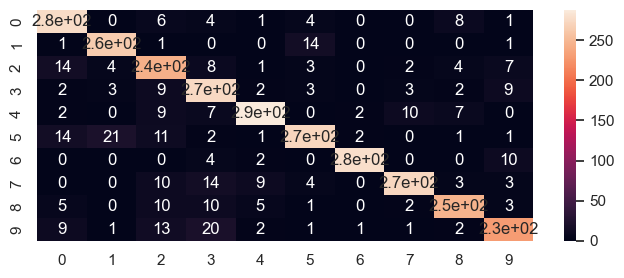

In [25]:
# Applying K nearest Neighbour algorithm to predict the results
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train,y_train)
y_pred=clf1.predict(X_test) 
print("Training set score: {:.3f}".format(clf1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf1.score(X_test, y_test)))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(8,3)})
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test,y_pred))

It creates a classification model with the KNN algorithm and evaluates the performance of this model. Heatmap visually shows confusion between classes, while classification_report reports the classification performance of the model in detail.

Lighter colors may represent lower confusion, darker colors may represent higher confusion.

-------------------------------
Support Vector Machine (SVM)

SVM is one of the best machine learning models. Since the data is not linearly separable, we have used the SVM kernel function as sigmoid. The sigmoid function is given by K(yn,yi) = tanh(-gamma*(yn,yi)+r)

Training set score: 0.917
Test set score: 0.852
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       300
           1       0.88      0.98      0.93       281
           2       0.80      0.80      0.80       287
           3       0.78      0.83      0.80       307
           4       0.94      0.83      0.88       325
           5       0.89      0.88      0.88       325
           6       0.90      0.90      0.90       294
           7       0.89      0.87      0.88       316
           8       0.83      0.81      0.82       282
           9       0.76      0.73      0.74       280

    accuracy                           0.85      2997
   macro avg       0.85      0.85      0.85      2997
weighted avg       0.85      0.85      0.85      2997



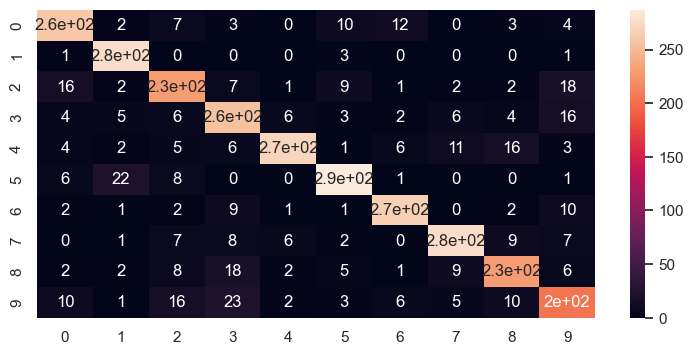

In [26]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8) 
# Creates an SVM classifier using the RBF (Radial Basis Function) kernel.
# degree parameter specifies the degree of the RBF kernel.

svclassifier.fit(X_train, y_train)
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))

The RBF kernel has a structure where the larger the distance between two sample points, the smaller the kernel value. This means that the influence of one point falls with greater weight on other points closer to that point. This feature allows SVM to learn flexible and complex decision boundaries and project data points into a higher dimensional space.

-------------------------
Convolutional Neural Networks (CNN)

Convolutional Neural Networks (CNN) is an extremely effective tool in big data clustering and classification tasks, especially widely used to classify image data. Image classification tasks involve the process of assigning an image to a particular class based on the features it contains.

In [29]:
# Training the model using the following parameters:
# - metrics: accuracy
# - epochs: 600
# - loss: sparse_categorical_crossentropy
# - batch_size: 256 (the batch size used during training)
# - optimizer: adam

def train_model(model, epochs, optimizer):
    batch_size = 256
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # In this step, the model's optimization strategy (optimizer), loss function (loss), and performance metrics (metrics) are specified.
    
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

In [30]:
def Validation_plot(history):
    print("Validation Accuracy:", max(history.history["val_accuracy"]))
    # Print the highest validation accuracy obtained during the training process.
    # The 'history.history' dictionary contains the recorded metric values during the training process.
    
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    # Create a DataFrame from the training history and plot it.
    
    plt.show()

Keras is a high-level API of TensorFlow 2: a platform focused on modern deep learning, providing an approachable and highly productive interface. Keras provides the basic abstractions and building blocks for solving high-iteration machine learning problems.

In [31]:
# Create a Sequential model
# Design and train a neural network model for a specific music genre classification task.

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X.shape[1],)),  # Flatten layer that flattens the input data dimension
    
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting (randomly drop out neurons)
    
    tf.keras.layers.Dense(512, activation='relu'),  # Fully connected layer with 512 neurons, using ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    
    tf.keras.layers.Dense(256, activation='relu'),  # Fully connected layer with 256 neurons, using ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons, using ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    
    tf.keras.layers.Dense(64, activation='relu'),  # Fully connected layer with 64 neurons, using ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    
    tf.keras.layers.Dense(32, activation='relu'),  # Fully connected layer with 32 neurons, using ReLU activation function
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    
    tf.keras.layers.Dense(10, activation='softmax'),  # Output layer: softmax activation function for 10-class multi-class classification
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.000146)  # Define optimizer and loss function, compile the model

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()
model_history = train_model(model=model, epochs=600, optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 58)                0         
                                                                 
 dropout_6 (Dropout)         (None, 58)                0         
                                                                 
 dense_6 (Dense)             (None, 512)               30208     
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [32]:
# Evaluate the performance of the model on the test dataset
# The batch_size=256 parameter specifies the batch size to be used during the evaluation process.

test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=256)

# Print the test loss and accuracy
print("The test loss is ", test_loss)
print("The test accuracy is: ", test_acc * 100)

12/12 [==============================] - 0s 8ms/step - loss: 0.1895 - accuracy: 0.9456
The test loss is  0.18950960040092468
The best accuracy is:  94.56122517585754


Validation Accuracy 0.9472805857658386


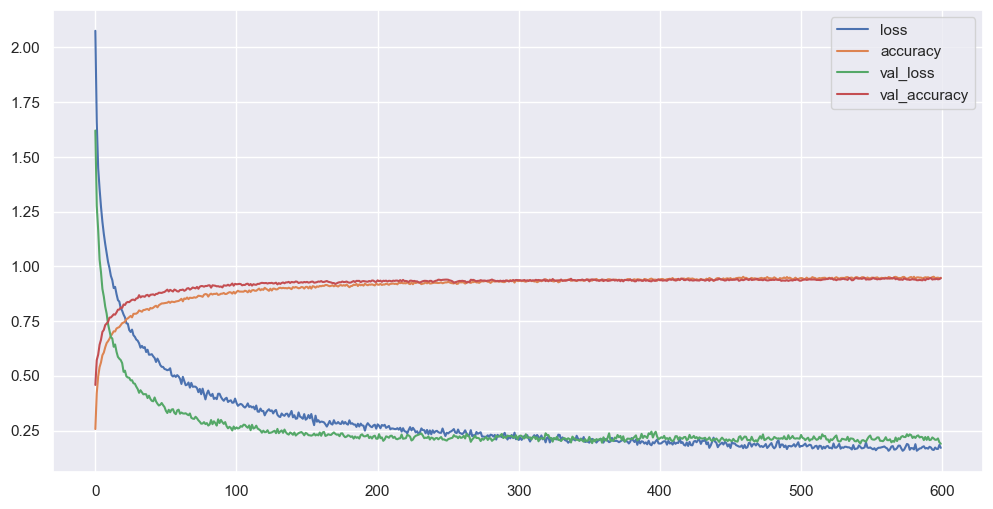

In [33]:
# Call a function designed to visualize the performance of training and validation data using the model_history object
Validation_plot(model_history)

In [34]:
# Sample test
sample = X_test
sample = sample[np.newaxis, ...]

# Make predictions with the model
prediction = model.predict(X_test)

# Find the predicted index
predicted_index = np.argmax(prediction, axis=1)

# Print the actual and predicted indices
print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_index))

94/94 [==============================] - 1s 3ms/step
Expected Index: [1 0 9 ... 4 1 3], Predicted Index: [1 0 9 ... 4 1 3]


In [35]:
import seaborn as sn
import matplotlib.pyplot as plt

# Get predictions from the model
pred_x = model.predict(X_test)

# Create a confusion matrix using the confusion_matrix function from the scikit-learn library
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_index)

# Print the confusion matrix
cm

94/94 [==============================] - 1s 4ms/step


array([[282,   1,   3,   2,   1,   3,   2,   0,   3,   3],
       [  0, 279,   1,   0,   0,   1,   0,   0,   0,   0],
       [  7,   2, 265,   0,   0,   4,   1,   0,   3,   5],
       [  0,   2,   2, 296,   1,   1,   0,   3,   1,   1],
       [  1,   0,   1,   1, 306,   0,   0,   7,   7,   2],
       [  2,  13,   4,   0,   0, 304,   0,   0,   0,   2],
       [  0,   0,   1,   7,   0,   0, 277,   0,   1,   8],
       [  0,   0,   3,   4,   5,   0,   0, 296,   5,   3],
       [  1,   0,   2,   0,   3,   1,   0,   0, 273,   2],
       [  2,   0,   9,   2,   1,   2,   4,   0,   4, 256]], dtype=int64)

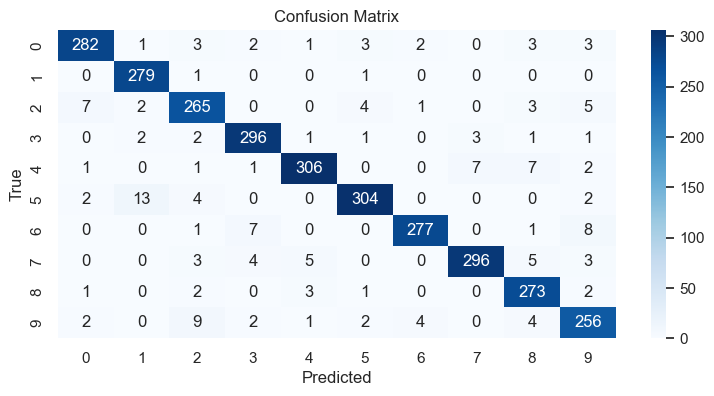

In [36]:
# Heatmap visualization of the confusion matrix
sn.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Adding axis labels and a title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the confusion matrix heatmap
plt.show()

As expected, convolutional neural network (CNN) outperformed k-NN and SVM in terms of performance. It produced the best results on both testing and training data. As we increased the number of epochs, a decrease in the percentage of misses and a gradual increase in accuracy scores were observed.

Convolutional neural network (CNN) is a deep learning architecture that is particularly powerful on image data. Therefore, it can be expected to perform well on a problem working on audio data, such as music genre classification.


Increasing the number of epochs allows the model to be trained more. Increasing the number of epochs can generally result in lower loss and higher accuracy. However, caution should be exercised over overlearning; therefore, it is important to track performance on the validation dataset.


The closeness of the curves in the validation plot indicates that the model performs similarly on the training and validation data sets. This shows that the generalization ability of the model is good and that it can perform stably against new data sets.